In [13]:
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [14]:
def read_data(filename):
    x = []
    y = []
    dx = []
    dy = []

    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader, None)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            dx.append(float(row[2]))
            dy.append(float(row[3]))

    return headers, x, y, dx, dy

In [15]:
# Step 3a: Define a quadratic fit function
def fitfunction(x, *param):
    return param[0]*x*x + param[1]*x + param[2]

In [16]:
# Step 1:  Read the data into appropriate data structures
file_name = "testdata.csv"
header_values, xi, yi, dxi, dyi = read_data(file_name)

# print(header_values)
# print(xi, yi, dxi, dyi)

(0.0, 101.85)

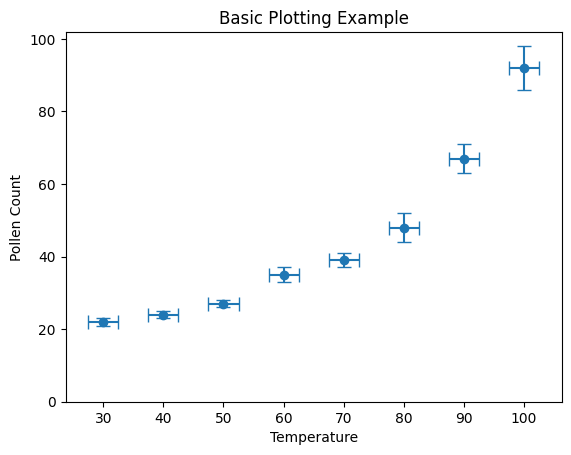

In [17]:
# Step 2: Basic plot of the data with error bars, plot title, and axis labels
plt.errorbar(xi, yi, xerr=dxi, yerr=dyi, fmt='o', label="Pollen Count Data", capsize=5.0)
plt.title("Basic Plotting Example")
plt.xlabel(header_values[0])
plt.ylabel(header_values[1])

# Make sure lower limit of y-axis is zero!
plt.ylim(0)

In [18]:
# Step 3b:  Fit the data
init_vals = [0 for x in range(3)]
popt, pcov = curve_fit(fitfunction, xi, yi, p0=init_vals, sigma=dyi, absolute_sigma=True)

# print(popt)
# print(perr)
# print(pcov)

In [19]:
# Step 3c:  Extract the fit parameters, with uncertainties
perr = np.sqrt(np.diag(pcov))
a = popt[0]
b = popt[1]
c = popt[2]
da = perr[0]
db = perr[1]
dc = perr[2]
print(f'Fit Result: y = ({a:.5f} +/- {da:.5f})x^2 + ({b:.5f} +/- {db:.5f})x + ({c:.5f} +/- {dc:.5f})')

Fit Result: y = (0.01297 +/- 0.00170)x^2 + (-0.81965 +/- 0.18702)x + (35.43091 +/- 4.79262)


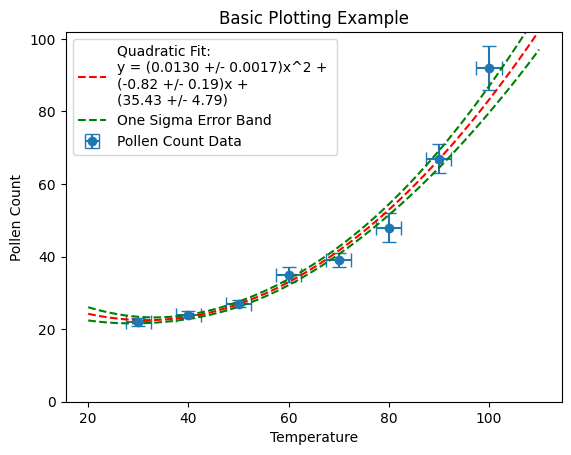

In [20]:
# Step 2: Basic plot of the data with error bars, plot title, and axis labels
plt.errorbar(xi, yi, xerr=dxi, yerr=dyi, fmt='o', label="Pollen Count Data", capsize=5.0)
plt.title("Basic Plotting Example")
plt.xlabel(header_values[0])
plt.ylabel(header_values[1])

# Make sure lower limit of y-axis is zero!
plt.ylim(0)

# Possibly, choose logarithmic x and/or y scales.
# plt.xscale('log')
# plt.yscale('log')
#
# Step 3d:  Plot the fit result
xlow = min(xi) - 10
xhigh = max(xi) + 10
xfit = np.linspace(xlow, xhigh, 100)
yfit = fitfunction(xfit,*popt)

plt.plot(xfit,yfit,'r--', label = f"Quadratic Fit: \ny = ({a:.4f} +/- {da:.4f})x^2 + \n({b:.2f} +/- {db:.2f})x + \n({c:.2f} +/- {dc:.2f})")

# Step 4:  Plot the error band

plot_error_band = True

if plot_error_band:
    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample = np.asarray([fitfunction(xfit,*pi) for pi in ps])

    lower = np.percentile(ysample, 16.0, axis=0)
    upper = np.percentile(ysample, 84.0, axis=0)
    plt.plot(xfit,upper,'g--', label='One Sigma Error Band')
    plt.plot(xfit,lower,'g--')

plt.legend()
plt.show()